In [5]:
%pip install PyMuPDF4llm pillow docx2pdf
%rm -r Images/* #CLEARS EVERYTHING IN IMAGES FOLDER

Note: you may need to restart the kernel to use updated packages.
zsh:1: no matches found: Images/*


In [6]:
import fitz
import os
from PIL import Image
from docx2pdf import convert
from IPython.display import Image, display


In [7]:
file_path = "files/38473-h20.pdf"

pdf_file = fitz.open(file_path)

In [ ]:
page_nums = len(pdf_file)

In [9]:
Images_list= []
Text_list = []
for page_num in range(page_nums):
    page = pdf_file[page_num]
    page_dict = page.get_text("dict")
    blocks = page_dict["blocks"]

    textblocks = [b for b in blocks if b["type"] == 0]
    imageblocks = [b for b in blocks if b["type"] == 1]
    for t in textblocks:
        t['page'] = int(page_num)+1
    Text_list.extend(textblocks)
    
    with open("files/logo.jpeg","rb") as logo:
        logo_bytes = logo.read()

    page_list = [
    image for image in imageblocks
    if image["image"] and image["image"] != logo_bytes and len(image["image"]) > 700
    ]
    if page_list:
        for p in page_list:
            p['page'] = int(page_num)+1
        Images_list.extend(page_list)
    for i,img in enumerate(page_list, start =1):
        bytes = img["image"]
        ext = img["ext"]
        name = F"page{page_num+1}_img{i}.{ext}"

        with open(os.path.join('Images/',name),'wb') as image_file:
            image_file.write(bytes)
            image_file.close()
print(Images_list)

[{'number': 10, 'type': 1, 'bbox': (42.550079345703125, 314.35009765625, 138.0000762939453, 409.80010986328125), 'width': 292, 'height': 292, 'ext': 'png', 'colorspace': 3, 'xres': 96, 'yres': 96, 'bpc': 8, 'transform': (95.44999694824219, 0.0, -0.0, 95.44999694824219, 42.550079345703125, 314.35009765625), 'size': 32316, 'image': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01$\x00\x00\x01$\x08\x02\x00\x00\x00\t\x9b\xdb\xbb\x00\x00\x00\tpHYs\x00\x00\x0e\xc4\x00\x00\x0e\xc4\x01\x95+\x0e\x1b\x00\x00}\xeeIDATx\x9c\xec\xbd\x07\\T\xd7\xd66~f\xce\x14\x86^\x87:\xcc\x0c0\x94a\xe8\x1d\x15\xec\xbda\xaf\x14\x95"HQT\x04QD\x04+\x16\xec(vc\xa2\x89IL\xbd\xb9\xb9\xc9\xcd\xcd\x9b\xe4\xde\xdc\xf4h\x1256\x04i\xd2\xcb\xb4sf\x7f{\xef3\x83\x9a\xf7\xde\xf7\xff\x7f\x93\xf7\xc5\xe4\xfb\xce\xf3[\xbfq`\x0e\xe3a8\xcfYk\xed\xbd\xd6\xb3\x08\xc0\x82\x05\x8b!\x01\xf1\xbcO\x80\x05\x8b\xffW\xc0\x92\x8d\x05\x8b!\x02K6\x16,\x86\x08,\xd9X\xb0\x18"\xb0dc\xc1b\x88\xc0\x92\x8d\x05\x8b!\x02K6\x16,\x86\x08,\xd9X\xb0\x18"\xb0

2 image(s) extracted


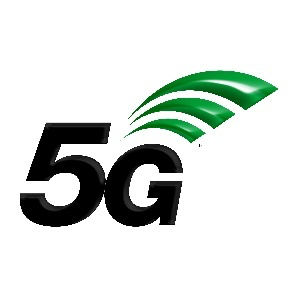

In [10]:
print(f"{len(Images_list)} image(s) extracted")
display(Image(data=Images_list[0]["image"]))

In [11]:
Images_list[0]

{'number': 10,
 'type': 1,
 'bbox': (42.550079345703125,
  314.35009765625,
  138.0000762939453,
  409.80010986328125),
 'width': 292,
 'height': 292,
 'ext': 'png',
 'colorspace': 3,
 'xres': 96,
 'yres': 96,
 'bpc': 8,
 'transform': (95.44999694824219,
  0.0,
  -0.0,
  95.44999694824219,
  42.550079345703125,
  314.35009765625),
 'size': 32316,
 'image': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01$\x00\x00\x01$\x08\x02\x00\x00\x00\t\x9b\xdb\xbb\x00\x00\x00\tpHYs\x00\x00\x0e\xc4\x00\x00\x0e\xc4\x01\x95+\x0e\x1b\x00\x00}\xeeIDATx\x9c\xec\xbd\x07\\T\xd7\xd66~f\xce\x14\x86^\x87:\xcc\x0c0\x94a\xe8\x1d\x15\xec\xbda\xaf\x14\x95"HQT\x04QD\x04+\x16\xec(vc\xa2\x89IL\xbd\xb9\xb9\xc9\xcd\xcd\x9b\xe4\xde\xdc\xf4h\x1256\x04i\xd2\xcb\xb4sf\x7f{\xef3\x83\x9a\xf7\xde\xf7\xff\x7f\x93\xf7\xc5\xe4\xfb\xce\xf3[\xbfq`\x0e\xe3a8\xcfYk\xed\xbd\xd6\xb3\x08\xc0\x82\x05\x8b!\x01\xf1\xbcO\x80\x05\x8b\xffW\xc0\x92\x8d\x05\x8b!\x02K6\x16,\x86\x08,\xd9X\xb0\x18"\xb0dc\xc1b\x88\xc0\x92\x8d\x05\x8b!\x02K6\x16,

{'img': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01$\x00\x00\x01$\x08\x02\x00\x00\x00\t\x9b\xdb\xbb\x00\x00\x00\tpHYs\x00\x00\x0e\xc4\x00\x00\x0e\xc4\x01\x95+\x0e\x1b\x00\x00}\xeeIDATx\x9c\xec\xbd\x07\\T\xd7\xd66~f\xce\x14\x86^\x87:\xcc\x0c0\x94a\xe8\x1d\x15\xec\xbda\xaf\x14\x95"HQT\x04QD\x04+\x16\xec(vc\xa2\x89IL\xbd\xb9\xb9\xc9\xcd\xcd\x9b\xe4\xde\xdc\xf4h\x1256\x04i\xd2\xcb\xb4sf\x7f{\xef3\x83\x9a\xf7\xde\xf7\xff\x7f\x93\xf7\xc5\xe4\xfb\xce\xf3[\xbfq`\x0e\xe3a8\xcfYk\xed\xbd\xd6\xb3\x08\xc0\x82\x05\x8b!\x01\xf1\xbcO\x80\x05\x8b\xffW\xc0\x92\x8d\x05\x8b!\x02K6\x16,\x86\x08,\xd9X\xb0\x18"\xb0dc\xc1b\x88\xc0\x92\x8d\x05\x8b!\x02K6\x16,\x86\x08,\xd9X\xb0\x18"\xb0dc\xc1b\x88\xc0\x92\x8d\x05\x8b!\x02K6\x16,\x86\x08,\xd9X\xb0\x18"\xb0dc\xc1b\x88\xc0\x92\x8d\x05\x8b!\x02K6\x16,\x86\x08,\xd9X\xb0\x18"\xb0dc\xc1b\x88\xc0\x92\x8d\x05\x8b!\x02K6\x16,\x86\x08,\xd9X\xb0\x18"\xb0dc\xc1b\x88\xc0\x92\x8d\x05\x8b!\x02K6\x16,\x86\x08,\xd9X\xb0\x18"\xb0dc\xc1b\x88\xc0\x92\x8d\x05\x8b!\x02K6\x16,\

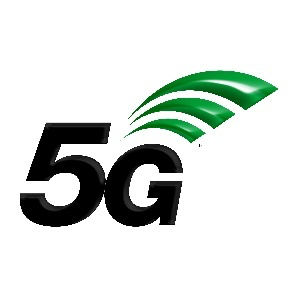

1


In [12]:
cleaned_image = []
for img in Images_list:
    cleaned_image.append({"img":img['image'],"bbox":img['bbox'],"page":img['page']})
print(cleaned_image[0])
display(Image(data=cleaned_image[0]['img']))
print(cleaned_image[0]['page'])


In [13]:
Text_list[4]["page"]

1

In [14]:
cleaned_text = []
for i in range(len(Text_list)):
    Textblock = []
    bbox = None
    page = None
    for line in Text_list[i]['lines']:
        for span in line['spans']:
            Textblock.append(span['text'])
        bbox = Text_list[i]['bbox']
        page = Text_list[i]['page']
    if "".join(Textblock).strip() != "":
        cleaned_text.append({"text":"".join(Textblock),"bbox":bbox,"page":page})

print(cleaned_text[1])
print(len(cleaned_text))

{'text': 'Technical Specification ', 'bbox': (449.10479736328125, 99.59757232666016, 554.1823120117188, 110.85693359375), 'page': 1}
11470


In [15]:
def findcaption(image):
    best_text = None
    min_distance = float('inf')
    for text in cleaned_text:
        if text["page"] == image["page"]:
            if text["bbox"][1] > image["bbox"][3]:
                vertical_distance = image["bbox"][1] - text["bbox"][3]
                #print(text["text"],abs(round(vertical_distance)))
                #print("COMPARING",round(abs(vertical_distance)), min_distance)
                if round(abs(vertical_distance)) < min_distance:
                    min_distance = abs(vertical_distance)
                    best_text = text
    return best_text['text']


In [16]:
print(findcaption(cleaned_image[1]))

The present document has been developed within the 3rd Generation Partnership Project (3GPP TM) and may be further elaborated for the purposes of 3GPP.. The present document has not been subject to any approval process by the 3GPP Organizational Partners and shall not be implemented. This Specification is provided for future development work within 3GPP only. The Organizational Partners accept no liability for any use of this Specification. Specifications and Reports for implementation of the 3GPP TM system should be obtained via the 3GPP Organizational Partners' Publications Offices. 


In [17]:
captioned_photos = cleaned_image
for img in captioned_photos:
    img['caption']= findcaption(img)

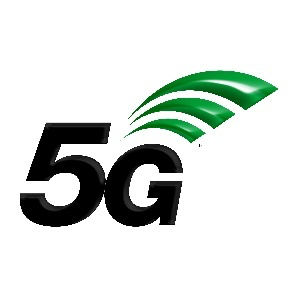

The present document has been developed within the 3rd Generation Partnership Project (3GPP TM) and may be further elaborated for the purposes of 3GPP.. The present document has not been subject to any approval process by the 3GPP Organizational Partners and shall not be implemented. This Specification is provided for future development work within 3GPP only. The Organizational Partners accept no liability for any use of this Specification. Specifications and Reports for implementation of the 3GPP TM system should be obtained via the 3GPP Organizational Partners' Publications Offices.  on page 1


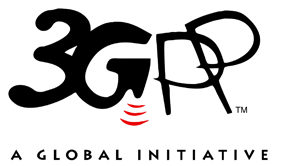

The present document has been developed within the 3rd Generation Partnership Project (3GPP TM) and may be further elaborated for the purposes of 3GPP.. The present document has not been subject to any approval process by the 3GPP Organizational Partners and shall not be implemented. This Specification is provided for future development work within 3GPP only. The Organizational Partners accept no liability for any use of this Specification. Specifications and Reports for implementation of the 3GPP TM system should be obtained via the 3GPP Organizational Partners' Publications Offices.  on page 1
{'img': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01$\x00\x00\x01$\x08\x02\x00\x00\x00\t\x9b\xdb\xbb\x00\x00\x00\tpHYs\x00\x00\x0e\xc4\x00\x00\x0e\xc4\x01\x95+\x0e\x1b\x00\x00}\xeeIDATx\x9c\xec\xbd\x07\\T\xd7\xd66~f\xce\x14\x86^\x87:\xcc\x0c0\x94a\xe8\x1d\x15\xec\xbda\xaf\x14\x95"HQT\x04QD\x04+\x16\xec(vc\xa2\x89IL\xbd\xb9\xb9\xc9\xcd\xcd\x9b\xe4\xde\xdc\xf4h\x1256\x04i\xd2\xcb\xb4sf\x7f{\

In [20]:
for img in captioned_photos:
    display(Image(data=img['img']))
    print(img['caption'],f"on page {img['page']}")
print(captioned_photos[0])